In [1]:
import numpy as np

#loading the saved numpy arrays in the previous part of the code
data=np.load('data.npy')
target=np.load('target.npy')


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flattening the data from the second convolution layer 
model.add(Flatten())

model.add(Dropout(0.5))

#creating the fully connected layer
model.add(Dense(50,activation='relu'))

#creating the final output layer
model.add(Dense(2,activation='softmax'))

#compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.
W0704 18:44:19.380525 20824 deprecation_wrapper.py:119] From C:\Users\MritunjayChoubey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [3]:
#splitting the dataset
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
#creating checkpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=30,callbacks=[checkpoint],validation_split=0.2)

W0704 18:44:25.256748 20824 deprecation.py:323] From C:\Users\MritunjayChoubey\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0704 18:44:26.249159 20824 deprecation_wrapper.py:119] From C:\Users\MritunjayChoubey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 990 samples, validate on 248 samples
Epoch 1/30
990/990 [==============================] - 43s 44ms/step - loss: 0.7215 - accuracy: 0.5364 - val_loss: 0.6872 - val_accuracy: 0.5282
Epoch 2/30
990/990 [==============================] - 51s 52ms/step - loss: 0.6544 - accuracy: 0.6172 - val_loss: 0.5784 - val_accuracy: 0.6935
Epoch 3/30
990/990 [==============================] - 48s 49ms/step - loss: 0.4907 - accuracy: 0.7848 - val_loss: 0.3716 - val_accuracy: 0.8669
Epoch 4/30
990/990 [==============================] - 45s 45ms/step - loss: 0.3361 - accuracy: 0.8525 - val_loss: 0.2925 - val_accuracy: 0.9113
Epoch 5/30
990/990 [==============================] - 53s 53ms/step - loss: 0.2571 - accuracy: 0.9040 - val_loss: 0.2534 - val_accuracy: 0.9274
Epoch 6/30
990/990 [==============================] - 54s 55ms/step - loss: 0.2057 - accuracy: 0.9232 - val_loss: 0.2996 - val_accuracy: 0.8669
Epoch 7/30
990/990 [==============================] - 42s 42ms/step - loss: 0.1698 - accur

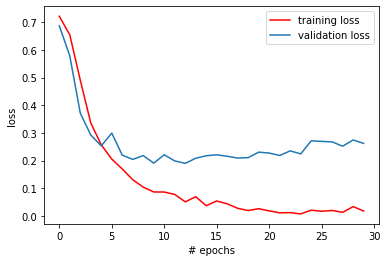

In [5]:
from matplotlib import pyplot as plt

#plotting the losses
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

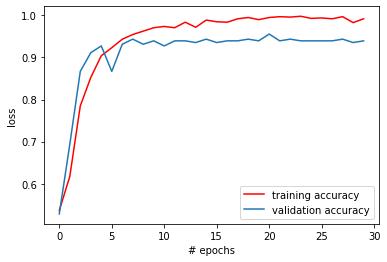

In [6]:
#plotting the accuracies
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 1s 8ms/step
[0.18927490291442128, 0.95652174949646]
